In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
%matplotlib inline
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\data_prep_functions.ipynb"
%run "C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\data_analysis_functions.ipynb"

#### <font color='darkorange'> Read the data (test runs below 15 seconds)

In [73]:
file_path = "C:/Users/anasofiaccruz/Desktop/Optogenetics processed data/below15_runs.csv"
below15 = pd.read_csv(file_path)
#below15

#### <font color='darkorange'> Remove baseline trials

In [74]:
below15 = below15[(below15['stim_condition']!=-1)]

In [75]:
counts=below15.groupby(['group','stim_condition']).count()['session']
counts

group  stim_condition
CTRL   0                  954
       1                  808
       3                  937
NPHR   0                 1196
       1                 1192
       3                 1164
Name: session, dtype: int64

#### <font color='darkorange'> Add session number

In [76]:
# Add session numbers to each session timestamp
below15= below15.groupby(['group', 'rat']).apply(add_session_nr).reset_index(drop=True)

#### <font color='darkorange'> Boxplot time in choice point across sessions

<Figure size 1800x1200 with 0 Axes>

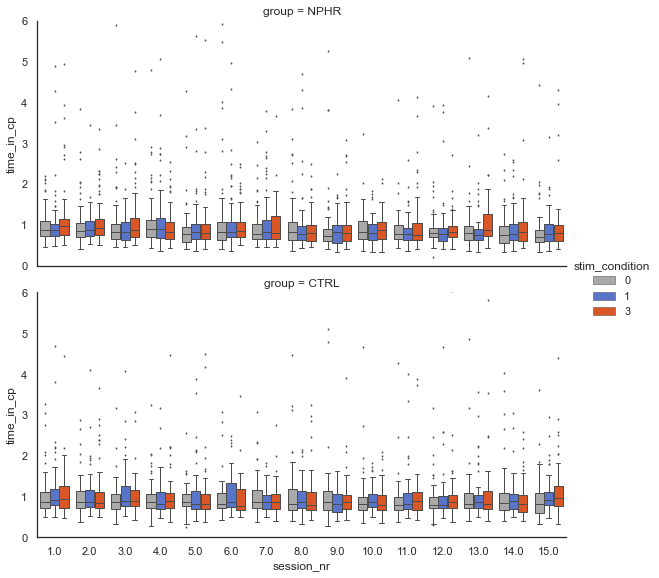

In [77]:
below15 = below15[(below15['session_nr']<16) & (below15['time_in_cp']>0)]
#no_vs_test = below15[(below15['stim_condition']==0)|(below15['stim_condition']==3)]
sns.set(style='white')
plt.figure(dpi=300)
g = sns.catplot(kind='box', data=below15, row='group', x='session_nr',
                y='time_in_cp', hue='stim_condition', palette=['darkgray', 'royalblue', 'orangered'],
                height=4, aspect=2, saturation=.7, linewidth=1, fliersize=1)
g.set(ylim=(0,6))
sns.despine()

#### <font color='darkorange'> Calculate the IQR values

In [78]:
iqr = below15.groupby(['group', 'stim_condition', 'session_nr', 'outcome']).apply(calculate_iqr,
                                                                                 'time_in_cp')

iqr_rats = below15.groupby(['group', 'rat', 'stim_condition', 'session_nr', 'outcome']).apply(calculate_iqr,
                                                                                 'time_in_cp')
iqr_rats = iqr_rats[iqr_rats['session_nr']<16]
iqr = iqr[iqr['session_nr']<16]
iqr.head(3)

,group,rat,outcome,stim_condition,session_nr,iqr_25,median,iqr_75,iqr
0,NPHR,NPHR1,1.0,1,1.0,0.695181,0.859533,0.959411,0.264230
1,NPHR,NPHR1,1.0,3,1.0,0.760307,0.925734,1.124058,0.363750
2,NPHR,NPHR1,0.0,3,1.0,0.784029,1.029357,1.203142,0.419114


#### <font color='darkorange'> Plot IQR and median across sessions

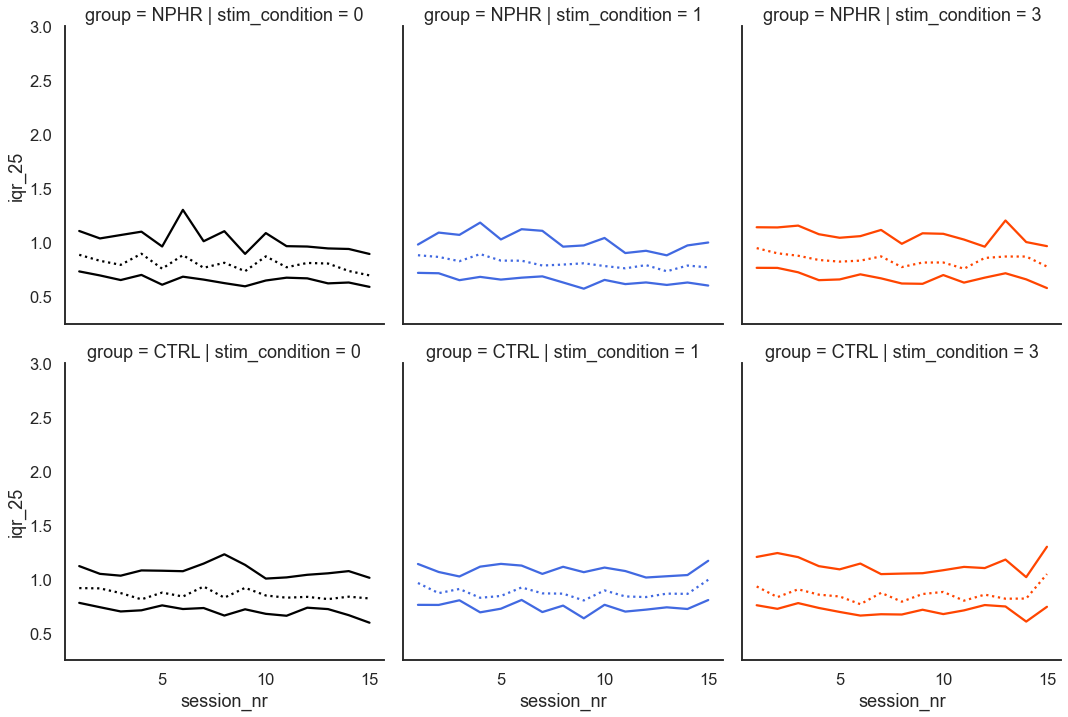

In [79]:
g = plot_iqr_and_median_across_sessions(iqr)
g.set(ylim=[0.25,3])

#### <font color='darkorange'> Individual median latencies across sessions 

<Figure size 1800x1200 with 0 Axes>

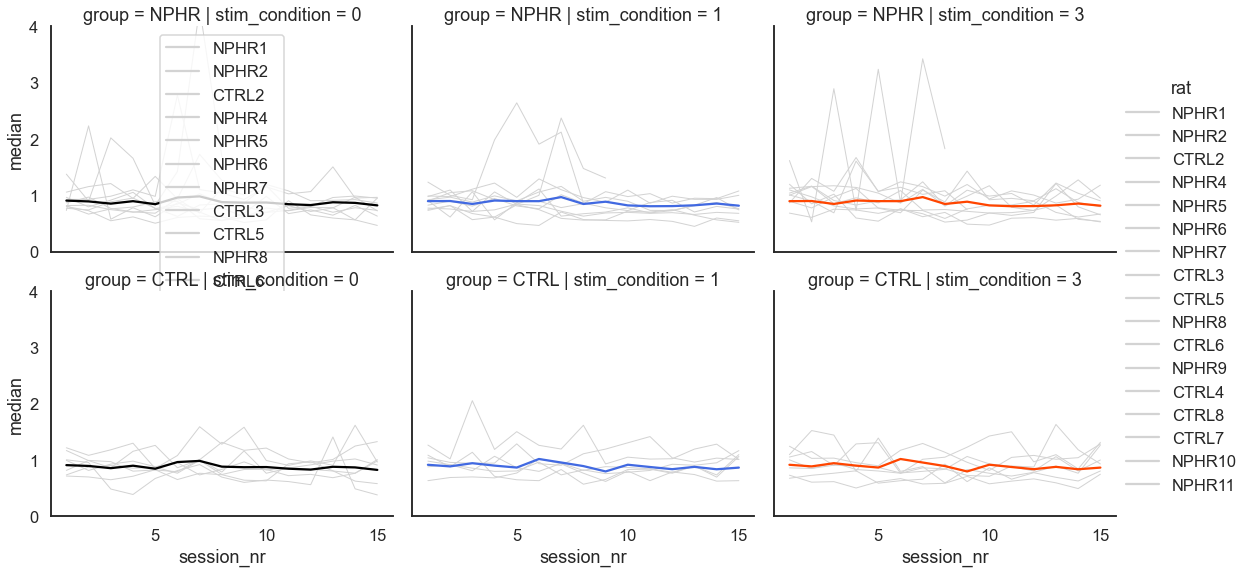

In [83]:
g = plot_individual_metrics_across_sessions(iqr_rats, 'median')
g.set(ylim=(0,4))

#### <font color='darkorange'> Individual IQR percentile across sessions 

<Figure size 1800x1200 with 0 Axes>

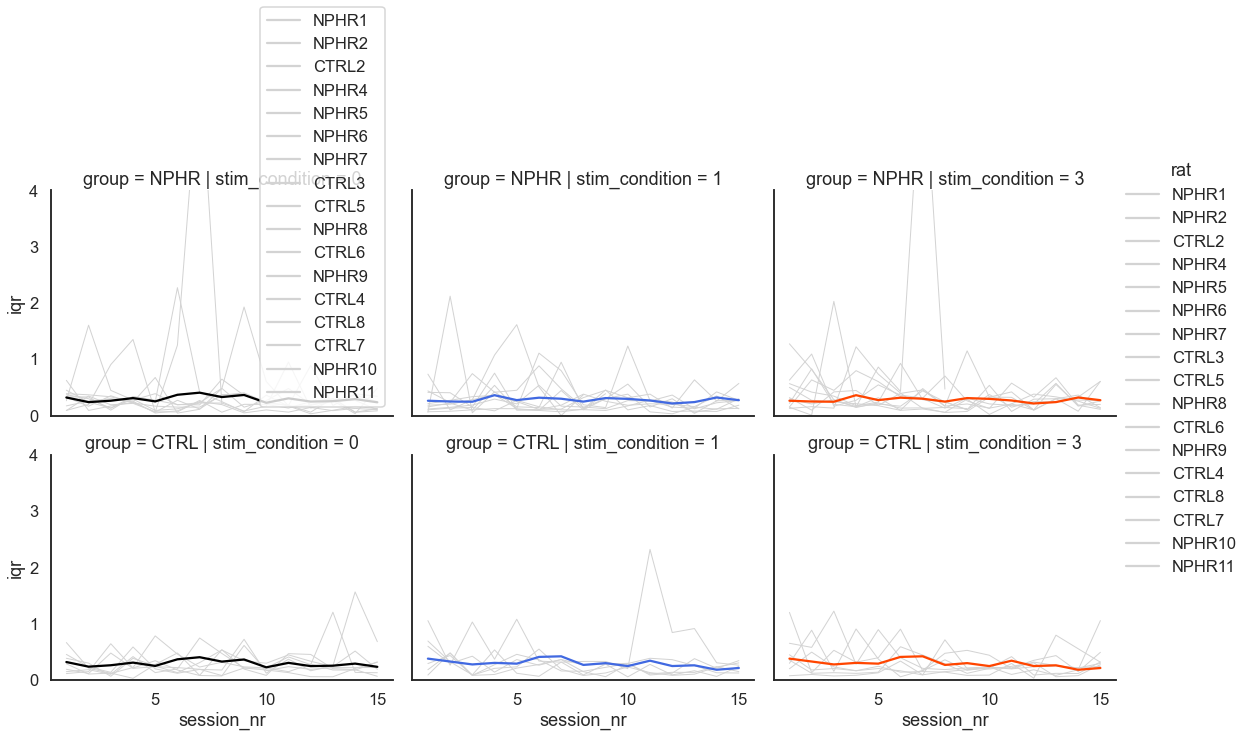

In [84]:
g = plot_individual_metrics_across_sessions(iqr_rats, 'iqr')
g.set(ylim=[0,4])

#### <font color='darkorange'> Inference testing using a mixed linear model - all data

In [61]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#NPHR Test
df = below15[(below15['stim_condition']==3) & (below15['group']=='NPHR')]
md = smf.mixedlm("time_in_cp ~ session_nr", df, groups=df['rat'])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: time_in_cp
No. Observations: 1146    Method:             REML      
No. Groups:       10      Scale:              0.6001    
Min. group size:  30      Log-Likelihood:     -1351.6314
Max. group size:  145     Converged:          Yes       
Mean group size:  114.6                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.172    0.100 11.680 0.000  0.975  1.369
session_nr    -0.010    0.005 -1.880 0.060 -0.021  0.000
Group Var      0.077    0.057                           



In [62]:
#NPHR None
df = below15[(below15['stim_condition']==0) & (below15['group']=='NPHR')]
md = smf.mixedlm("time_in_cp ~ session_nr", df, groups=df['rat'])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: time_in_cp
No. Observations: 1180    Method:             REML      
No. Groups:       10      Scale:              0.4571    
Min. group size:  32      Log-Likelihood:     -1233.4611
Max. group size:  150     Converged:          Yes       
Mean group size:  118.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.103    0.110 10.057 0.000  0.888  1.318
session_nr    -0.009    0.005 -1.863 0.062 -0.018  0.000
Group Var      0.103    0.080                           



In [63]:
#NPHR, Sample
df = below15[(below15['stim_condition']==1) & (below15['group']=='NPHR')]
md = smf.mixedlm("time_in_cp ~ session_nr", df, groups=df['rat'])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: time_in_cp
No. Observations: 1174    Method:             REML      
No. Groups:       10      Scale:              0.6614    
Min. group size:  32      Log-Likelihood:     -1439.6978
Max. group size:  151     Converged:          Yes       
Mean group size:  117.4                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.119    0.090 12.396 0.000  0.942  1.296
session_nr    -0.010    0.006 -1.747 0.081 -0.021  0.001
Group Var      0.057    0.040                           



In [64]:
#CTRL None
df = below15[(below15['stim_condition']==0) & (below15['group']=='CTRL')]
md = smf.mixedlm("time_in_cp ~ session_nr", df, groups=df['rat'])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: time_in_cp
No. Observations: 954     Method:             REML      
No. Groups:       7       Scale:              0.4304    
Min. group size:  117     Log-Likelihood:     -965.4288 
Max. group size:  147     Converged:          Yes       
Mean group size:  136.3                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.020    0.085 12.032 0.000  0.854  1.187
session_nr    -0.002    0.005 -0.436 0.663 -0.012  0.007
Group Var      0.036    0.035                           



In [65]:
#CTRL Sample
df = below15[(below15['stim_condition']==1) & (below15['group']=='CTRL')]
md = smf.mixedlm("time_in_cp ~ session_nr", df, groups=df['rat'])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: time_in_cp
No. Observations: 808     Method:             REML      
No. Groups:       6       Scale:              0.6055    
Min. group size:  115     Log-Likelihood:     -955.3739 
Max. group size:  147     Converged:          Yes       
Mean group size:  134.7                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.162    0.099 11.702 0.000  0.967  1.356
session_nr    -0.012    0.006 -1.955 0.051 -0.025  0.000
Group Var      0.040    0.036                           



In [66]:
#CTRL Test
df = below15[(below15['stim_condition']==3) & (below15['group']=='CTRL')]
md = smf.mixedlm("time_in_cp ~ session_nr", df, groups=df['rat'])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: time_in_cp
No. Observations: 937     Method:             REML      
No. Groups:       7       Scale:              0.7023    
Min. group size:  118     Log-Likelihood:     -1175.4947
Max. group size:  147     Converged:          Yes       
Mean group size:  133.9                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.135    0.087 13.035 0.000  0.964  1.306
session_nr    -0.010    0.006 -1.497 0.134 -0.022  0.003
Group Var      0.030    0.024                           

